#**Tugas Besar Machine Learning**
## **<"dataset trayek transportasi umum">**
### **Nama Kelompok [Bayu Krisna Mukti]**

##1. Identifikasi masalah dan Pernyataan masalah yang ingin diselesaikan

In [ ]:
Menganalisa faktor dari penyebab kelebihan muatan pada angkutan umum di Surabaya

## 2. Eksplorasi data (EDA) (25 poin)

In [1]:
!pip install git+https://github.com/nickkunz/smogn.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/nickkunz/smogn.git to /tmp/pip-req-build-gpcshd12
  Running command git clone -q https://github.com/nickkunz/smogn.git /tmp/pip-req-build-gpcshd12
  Created wheel for smogn: filename=smogn-0.1.1-py3-none-any.whl size=31260 sha256=1844744b5ae779400d1883728a454db943c2a14ef26b82b7c9401b13ebbd777e
  Stored in directory: /tmp/pip-ephem-wheel-cache-fywrwrtb/wheels/31/bb/2b/423f632f38f777fa7f7bd73085e546acf69c233b08a4466a1c
Successfully built smogn


In [2]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 5.3 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=6f7d06afb994e5992b4c722dc297fc834959875dd1552fa83807529d9a052001
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=d0710199c48a30f847b7c01be025998d72b302ce04e4897f2cd6ec9d5ddb9f79
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [3]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
import smogn
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [4]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [5]:
df=pd.read_csv("/content/drive/My Drive/Tubes ML/dataset trayek transportasi umum.csv")
# print(type(df))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Rata-rata waktu perjalanan trayek (menit)  50 non-null     int64  
 1   Jumlah angkutan beroperasi                 50 non-null     int64  
 2   Jumlah angkutan lulus uji KIR              50 non-null     int64  
 3   Jumlah angkutan tertib administrasi        50 non-null     int64  
 4   Jumlah angkutan berizin                    50 non-null     int64  
 5   Frekuensi                                  50 non-null     int64  
 6   Headway (menit)                            50 non-null     float64
 7   Waktu tunggu (menit)                       50 non-null     float64
 8   Kapasitas penumpang                        50 non-null     int64  
 9   Realisasi jumlah penumpang                 50 non-null     float64
 10  Load factor                 

In [53]:
target_column = 'Load factor'
feature_columns = ['Rata-rata waktu perjalanan trayek (menit)','Jumlah angkutan beroperasi','Headway (menit)', 'Waktu tunggu (menit)']

In [54]:
target=df[target_column]
fitur=df[feature_columns]
target
fitur

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Headway (menit),Waktu tunggu (menit)
0,72,5,28.194762,14.097381
1,85,14,20.341429,10.170714
2,51,5,28.947619,14.473810
3,58,51,24.139524,12.069762
4,101,70,24.731429,12.365714
5,75,102,25.000000,12.500000
6,129,23,21.170952,10.585476
7,123,15,15.379524,7.689762
8,103,26,22.116190,11.058095
9,61,91,25.778571,12.889286


In [55]:
#cek missing value 
df.isnull()

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [56]:
#cek duplikasi data
df.duplicated

<bound method DataFrame.duplicated of     Rata-rata waktu perjalanan trayek (menit)  Jumlah angkutan beroperasi  \
0                                          72                           5   
1                                          85                          14   
2                                          51                           5   
3                                          58                          51   
4                                         101                          70   
5                                          75                         102   
6                                         129                          23   
7                                         123                          15   
8                                         103                          26   
9                                          61                          91   
10                                         73                          99   
11                                    

In [57]:
import seaborn

In [58]:
#check distribusi data
waktu=df['Rata-rata waktu perjalanan trayek (menit)'].astype('int')

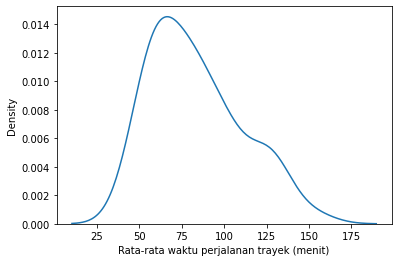

In [14]:
seaborn.kdeplot(waktu)

In [15]:
w=waktu.values

,sumsquare_error,aic,bic,kl_div
beta,0.019982,988.953766,-375.599754,inf
gamma,0.019990,1007.411188,-379.491274,inf
burr,0.020326,1026.951257,-374.746072,inf
norm,0.021451,1015.680403,-379.875257,inf
lognorm,0.033855,1309.202953,-353.149129,inf


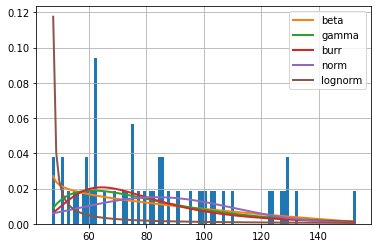

In [16]:
wak=Fitter(w,distributions=['gamma',
      'lognorm',
                          "beta",
                          "burr",
                          "norm"])
wak.fit()
wak.summary()

In [17]:
df.corr()

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
Rata-rata waktu perjalanan trayek (menit),1.000000,-0.050082,0.038109,0.038109,0.038109,0.237519,-0.375830,-0.375830,NaN,0.334092,0.334092
Jumlah angkutan beroperasi,-0.050082,1.000000,0.812529,0.812529,0.812529,0.189894,-0.020765,-0.020765,NaN,0.472438,0.472438
Jumlah angkutan lulus uji KIR,0.038109,0.812529,1.000000,1.000000,1.000000,0.123200,-0.044987,-0.044987,NaN,0.520543,0.520543
Jumlah angkutan tertib administrasi,0.038109,0.812529,1.000000,1.000000,1.000000,0.123200,-0.044987,-0.044987,NaN,0.520543,0.520543
Jumlah angkutan berizin,0.038109,0.812529,1.000000,1.000000,1.000000,0.123200,-0.044987,-0.044987,NaN,0.520543,0.520543
Frekuensi,0.237519,0.189894,0.123200,0.123200,0.123200,1.000000,-0.261086,-0.261086,NaN,0.388997,0.388997
Headway (menit),-0.375830,-0.020765,-0.044987,-0.044987,-0.044987,-0.261086,1.000000,1.000000,NaN,-0.179745,-0.179745
Waktu tunggu (menit),-0.375830,-0.020765,-0.044987,-0.044987,-0.044987,-0.261086,1.000000,1.000000,NaN,-0.179745,-0.179745
Kapasitas penumpang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Realisasi jumlah penumpang,0.334092,0.472438,0.520543,0.520543,0.520543,0.388997,-0.179745,-0.179745,NaN,1.000000,1.000000


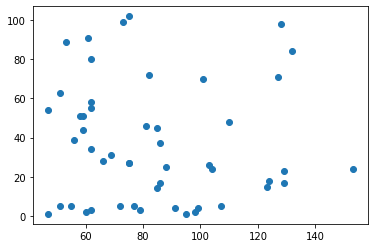

In [18]:
#hubungan antar data
plt.scatter(df['Rata-rata waktu perjalanan trayek (menit)'], df['Jumlah angkutan beroperasi'])
plt.show()

In [19]:
np.corrcoef(df['Rata-rata waktu perjalanan trayek (menit)'], df['Jumlah angkutan beroperasi'])


array([[ 1.        , -0.05008241],
       [-0.05008241,  1.        ]])

## 3.Persiapan Data (termasuk split data) (25 poin)

In [20]:
#memisahkan kolom fitur dan label
df = pd.DataFrame(df)
df.head()

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
0,72,5,0,0,0,2,28.194762,14.097381,12,3.6108,30.09
1,85,14,0,0,0,2,20.341429,10.170714,12,3.0636,25.53
2,51,5,4,4,4,1,28.947619,14.473810,12,2.9700,24.75
3,58,51,13,13,13,2,24.139524,12.069762,12,3.3036,27.53
4,101,70,26,26,26,2,24.731429,12.365714,12,2.7732,23.11


In [21]:
x = df.iloc[:, :-1]
x.head()

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang
0,72,5,0,0,0,2,28.194762,14.097381,12,3.6108
1,85,14,0,0,0,2,20.341429,10.170714,12,3.0636
2,51,5,4,4,4,1,28.947619,14.473810,12,2.9700
3,58,51,13,13,13,2,24.139524,12.069762,12,3.3036
4,101,70,26,26,26,2,24.731429,12.365714,12,2.7732


In [22]:
y = df.iloc[:, -1]
y.head()

0    30.09
1    25.53
2    24.75
3    27.53
4    23.11
Name: Load factor, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

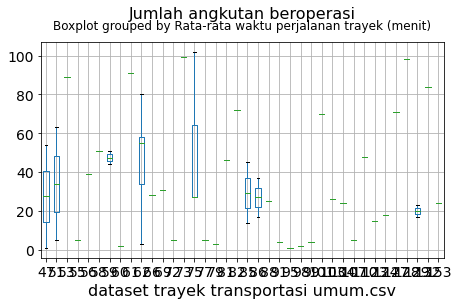

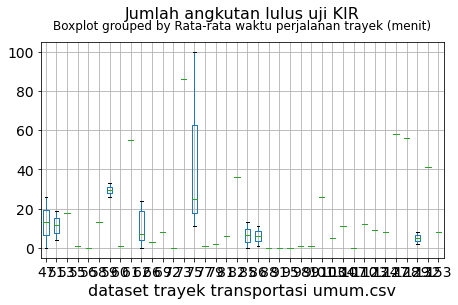

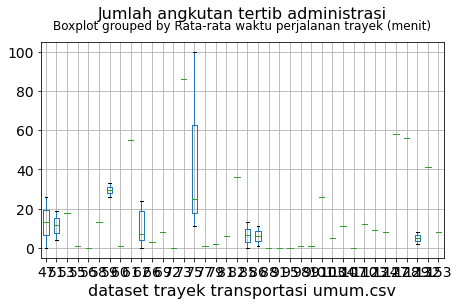

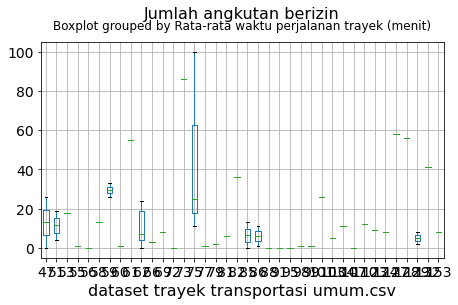

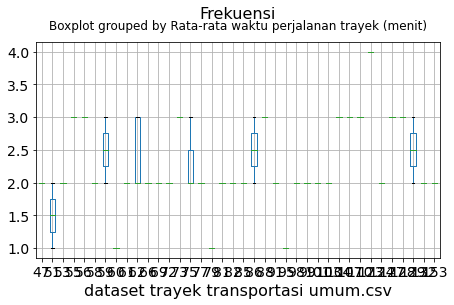

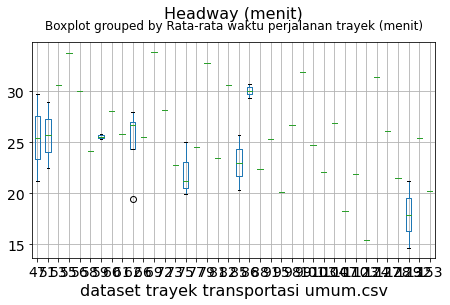

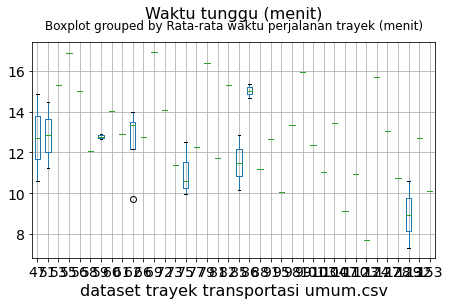

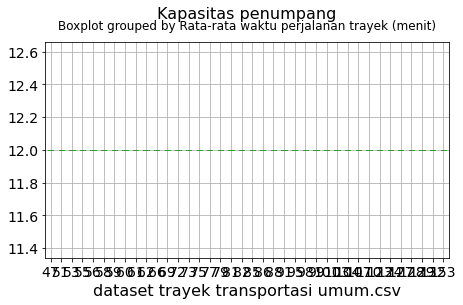

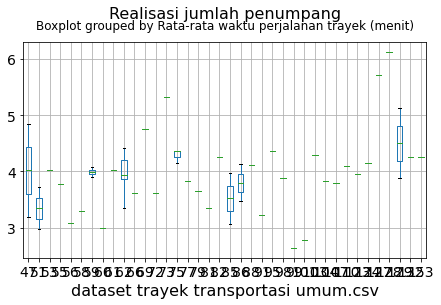

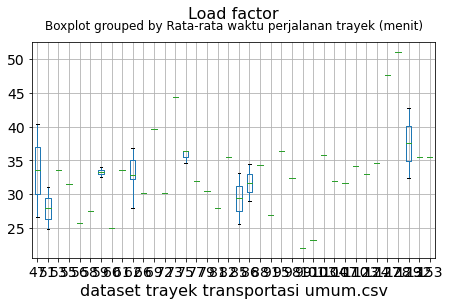

In [23]:
for c in df.columns[1:]:
    df.boxplot(c,by='Rata-rata waktu perjalanan trayek (menit)',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("dataset trayek transportasi umum.csv", fontsize=16)

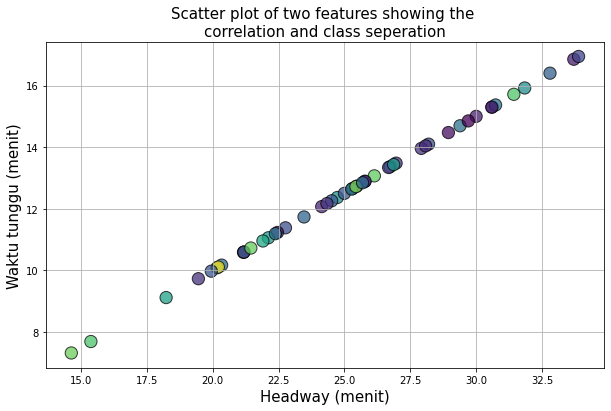

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df['Headway (menit)'],df['Waktu tunggu (menit)'],c=df['Rata-rata waktu perjalanan trayek (menit)'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("Headway (menit)",fontsize=15)
plt.ylabel("Waktu tunggu (menit)",fontsize=15)
plt.show()

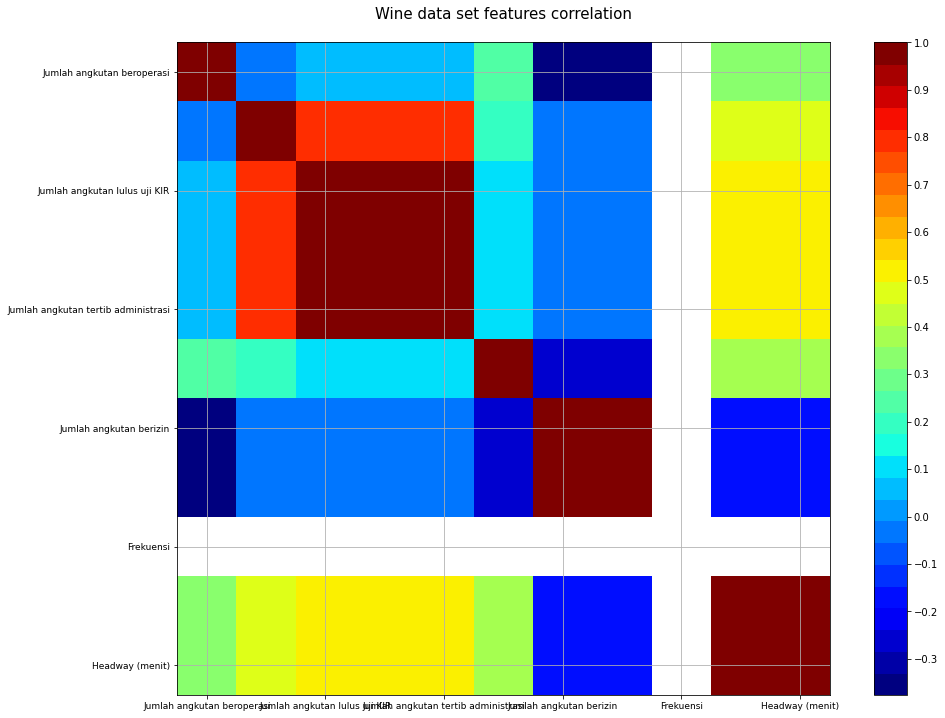

In [25]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [26]:
df.corr()

,Rata-rata waktu perjalanan trayek (menit),Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
Rata-rata waktu perjalanan trayek (menit),1.000000,-0.050082,0.038109,0.038109,0.038109,0.237519,-0.375830,-0.375830,NaN,0.334092,0.334092
Jumlah angkutan beroperasi,-0.050082,1.000000,0.812529,0.812529,0.812529,0.189894,-0.020765,-0.020765,NaN,0.472438,0.472438
Jumlah angkutan lulus uji KIR,0.038109,0.812529,1.000000,1.000000,1.000000,0.123200,-0.044987,-0.044987,NaN,0.520543,0.520543
Jumlah angkutan tertib administrasi,0.038109,0.812529,1.000000,1.000000,1.000000,0.123200,-0.044987,-0.044987,NaN,0.520543,0.520543
Jumlah angkutan berizin,0.038109,0.812529,1.000000,1.000000,1.000000,0.123200,-0.044987,-0.044987,NaN,0.520543,0.520543
Frekuensi,0.237519,0.189894,0.123200,0.123200,0.123200,1.000000,-0.261086,-0.261086,NaN,0.388997,0.388997
Headway (menit),-0.375830,-0.020765,-0.044987,-0.044987,-0.044987,-0.261086,1.000000,1.000000,NaN,-0.179745,-0.179745
Waktu tunggu (menit),-0.375830,-0.020765,-0.044987,-0.044987,-0.044987,-0.261086,1.000000,1.000000,NaN,-0.179745,-0.179745
Kapasitas penumpang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Realisasi jumlah penumpang,0.334092,0.472438,0.520543,0.520543,0.520543,0.388997,-0.179745,-0.179745,NaN,1.000000,1.000000


In [59]:
#Teknik PCA
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [29]:
X = df.drop('Rata-rata waktu perjalanan trayek (menit)',axis=1)
y = df['Rata-rata waktu perjalanan trayek (menit)']

In [30]:
X = scaler.fit_transform(X)

In [31]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [32]:
dfx.head()

,Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
0,-1.057478,-0.731812,-0.731812,-0.731812,-0.415058,0.667780,0.667780,0.0,-0.512944,-0.512944
1,-0.758568,-0.731812,-0.731812,-0.731812,-0.415058,-1.097043,-1.097043,0.0,-1.311209,-1.311209
2,-1.057478,-0.548630,-0.548630,-0.548630,-2.011435,0.836964,0.836964,0.0,-1.447755,-1.447755
3,0.470285,-0.136471,-0.136471,-0.136471,-0.415058,-0.243525,-0.243525,0.0,-0.961093,-0.961093
4,1.101318,0.458871,0.458871,0.458871,-0.415058,-0.110510,-0.110510,0.0,-1.734850,-1.734850


In [33]:
dfx.describe()

,Jumlah angkutan beroperasi,Jumlah angkutan lulus uji KIR,Jumlah angkutan tertib administrasi,Jumlah angkutan berizin,Frekuensi,Headway (menit),Waktu tunggu (menit),Kapasitas penumpang,Realisasi jumlah penumpang,Load factor
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.0,5.000000e+01,5.000000e+01
mean,-9.325873e-17,-5.329071e-17,-5.329071e-17,-5.329071e-17,3.619327e-16,1.251776e-16,1.615375e-16,0.0,-2.493145e-16,-1.364117e-15
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,0.0,1.010153e+00,1.010153e+00
min,-1.190327e+00,-7.318123e-01,-7.318123e-01,-7.318123e-01,-2.011435e+00,-2.379033e+00,-2.379033e+00,0.0,-1.930915e+00,-1.930915e+00
25%,-9.827504e-01,-6.860168e-01,-6.860168e-01,-6.860168e-01,-4.150581e-01,-7.333668e-01,-7.333668e-01,0.0,-5.142568e-01,-5.142568e-01
50%,-3.102024e-01,-3.654482e-01,-3.654482e-01,-3.654482e-01,-4.150581e-01,3.406156e-02,3.406156e-02,0.0,-2.774089e-02,-2.774089e-02
75%,5.948314e-01,3.100356e-01,3.100356e-01,3.100356e-01,1.181319e+00,6.615197e-01,6.615197e-01,0.0,4.201164e-01,4.201164e-01
max,2.164110e+00,3.847739e+00,3.847739e+00,3.847739e+00,2.777696e+00,1.947095e+00,1.947095e+00,0.0,3.167363e+00,3.167363e+00


In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=None)

In [36]:
dfx_pca = pca.fit(dfx)

In [37]:
pd.DataFrame(dfx_pca.explained_variance_ratio_*100)

,0
0,5.173347e+01
1,2.413999e+01
2,1.356815e+01
3,7.634891e+00
4,2.923501e+00
5,1.120409e-17
6,2.953570e-19
7,9.973060e-32
8,1.083275e-33
9,1.867127e-64


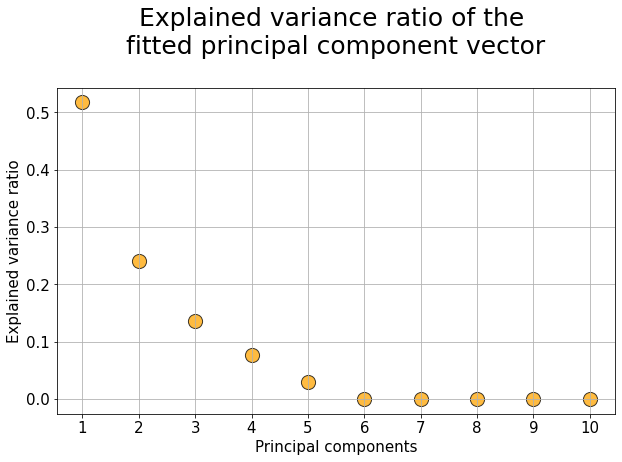

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [39]:
dfx_trans = pca.transform(dfx)

In [40]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.902600,-0.606719,-0.408535,0.195825,-0.349314,-5.956340e-11,-3.584558e-11,-2.484358e-16,3.199175e-17,4.516997e-31
1,-2.044654,1.306833,1.511470,-0.160072,-0.036166,-1.203374e-09,2.129493e-11,-7.973996e-17,-7.353424e-17,1.849026e-30
2,-2.605116,-1.659773,1.165447,0.807238,-0.329771,1.933671e-09,3.514187e-11,-2.312705e-17,-1.696358e-16,1.272186e-31
3,-0.699228,-0.106789,1.217138,-0.372844,0.542734,2.099744e-09,1.325137e-10,3.375358e-16,2.898886e-17,-1.794094e-31
4,-0.260166,-0.872466,2.359222,-1.153604,0.578866,-6.649292e-10,-1.426893e-12,5.695321e-16,9.208183e-17,1.748144e-30


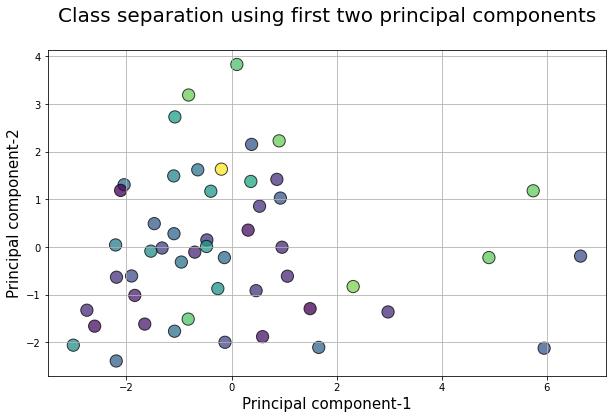

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Rata-rata waktu perjalanan trayek (menit)'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [82]:
#Teknik MSL
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx, y, test_size=0.2, random_state=0)

In [43]:
#Menerapkan 2 komponen utama sebagai prediktor
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [44]:
#Klasifikasi menggunakan SVM
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

[[0 0 1 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Und

## 4. Pemodelan (10 poin)

In [46]:
#Linear Regresi
#melakukan pelatihan dari input x_train dan y_train
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [47]:
#membuat prediksi untuk set pelatihan dan set pengujian
y_lr_train_pred = lr.predict(X_train) 
y_lr_test_pred = lr.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [49]:
#cetak MSE untuk set pelatihan nya 
print(lr_train_mse)

439.96236046824816


## 5. Eksperimen (10 poin)

In [130]:
fitur=df[feature_columns].values
target=df[target_column].values

In [132]:
train_feature, test_feature, train_target, test_target = train_test_split(fitur,target,test_size=20)

In [140]:
#mencoba membuat model menggunakan ANN 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, input_dim=4,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation="linear"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 8)                 40        
                                                                 
 dense_30 (Dense)            (None, 30)                270       
                                                                 
 dense_31 (Dense)            (None, 1)                 31        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(optimizer="adam",loss="mae",metrics=['mae'])

In [142]:
history=model.fit(train_feature,train_target,batch_size=10,epochs = 150, verbose=1, validation_split=0.2)

Epoch 1/150
3/3 [==============================] - 1s 173ms/step - loss: 32.3234 - mae: 32.3234 - val_loss: 30.7534 - val_mae: 30.7534
Epoch 2/150
3/3 [==============================] - 0s 26ms/step - loss: 31.7355 - mae: 31.7355 - val_loss: 30.2124 - val_mae: 30.2124
Epoch 3/150
3/3 [==============================] - 0s 29ms/step - loss: 31.2060 - mae: 31.2060 - val_loss: 29.7204 - val_mae: 29.7204
Epoch 4/150
3/3 [==============================] - 0s 29ms/step - loss: 30.7012 - mae: 30.7012 - val_loss: 29.2734 - val_mae: 29.2734
Epoch 5/150
3/3 [==============================] - 0s 28ms/step - loss: 30.2268 - mae: 30.2268 - val_loss: 28.8367 - val_mae: 28.8367
Epoch 6/150
3/3 [==============================] - 0s 37ms/step - loss: 29.7314 - mae: 29.7314 - val_loss: 28.3739 - val_mae: 28.3739
Epoch 7/150
3/3 [==============================] - 0s 44ms/step - loss: 29.2033 - mae: 29.2033 - val_loss: 27.8789 - val_mae: 27.8789
Epoch 8/150
3/3 [==============================] - 0s 25ms/st

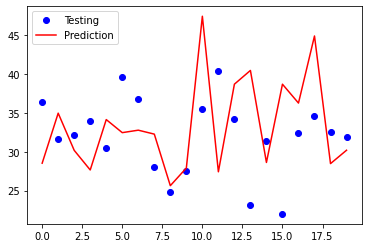

In [143]:
prediction = model.predict(test_feature)
index = range(len(prediction))
plt.figure()
plt.plot(index, test_target, 'ob')
plt.plot(index, prediction, '-r')
plt.legend(["Testing", "Prediction"])
plt.show()

In [144]:
mae = mean_absolute_error(prediction, test_target)
print('MAE = ', mae)

MAE =  6.3176400656777325


## 6. Evaluasi (5 poin) 

## 7. Kesimpulan (5 poin)


##8. Rekomendasi (5 poin)